<a href="https://colab.research.google.com/github/Amjadkp/Deep_Learning_Lab/blob/main/gan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()  # Output range (-1, 1)
        )

    def forward(self, x):
        x = self.main(x)
        return x.view(-1, 1, 28, 28)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability [0, 1]
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.main(x)


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Scale between (-1, 1)
])

dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

noise_dim = 100
G = Generator(noise_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
lr = 0.0002
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)


Epoch [1/50], d_loss: 0.0342, g_loss: 7.1876


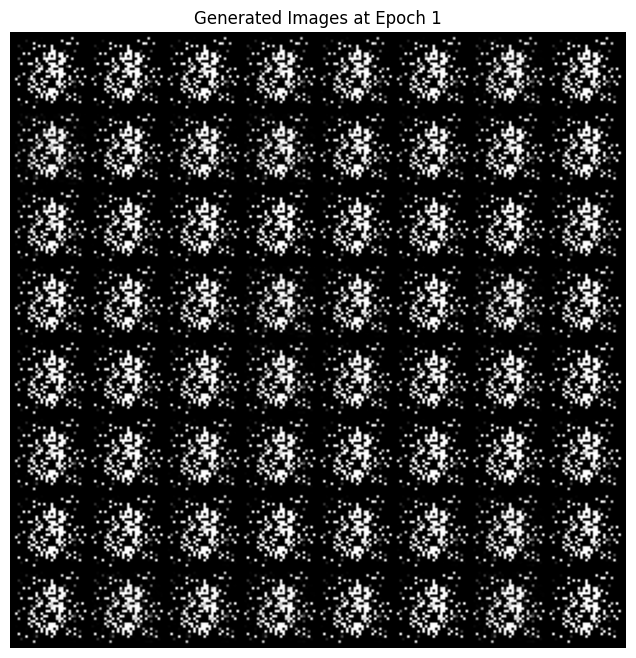

Epoch [2/50], d_loss: 0.0081, g_loss: 11.2087
Epoch [3/50], d_loss: 0.2582, g_loss: 18.9554
Epoch [4/50], d_loss: 0.9607, g_loss: 3.0356
Epoch [5/50], d_loss: 3.6351, g_loss: 2.9986
Epoch [6/50], d_loss: 0.6801, g_loss: 2.8379
Epoch [7/50], d_loss: 0.8128, g_loss: 2.2352
Epoch [8/50], d_loss: 1.1490, g_loss: 1.8892
Epoch [9/50], d_loss: 0.7656, g_loss: 2.9551
Epoch [10/50], d_loss: 0.8874, g_loss: 3.3945


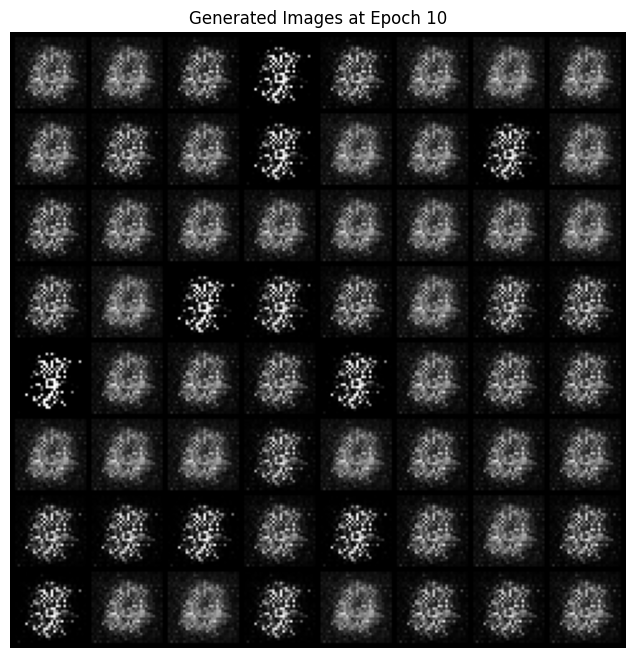

Epoch [11/50], d_loss: 0.6017, g_loss: 3.4735
Epoch [12/50], d_loss: 0.1990, g_loss: 3.2289
Epoch [13/50], d_loss: 0.4285, g_loss: 2.9238
Epoch [14/50], d_loss: 0.3101, g_loss: 3.7811
Epoch [15/50], d_loss: 0.6016, g_loss: 2.8274
Epoch [16/50], d_loss: 0.7349, g_loss: 3.0633
Epoch [17/50], d_loss: 0.6502, g_loss: 4.1763
Epoch [18/50], d_loss: 0.4925, g_loss: 3.5051
Epoch [19/50], d_loss: 0.6731, g_loss: 3.2362
Epoch [20/50], d_loss: 0.2194, g_loss: 4.2244


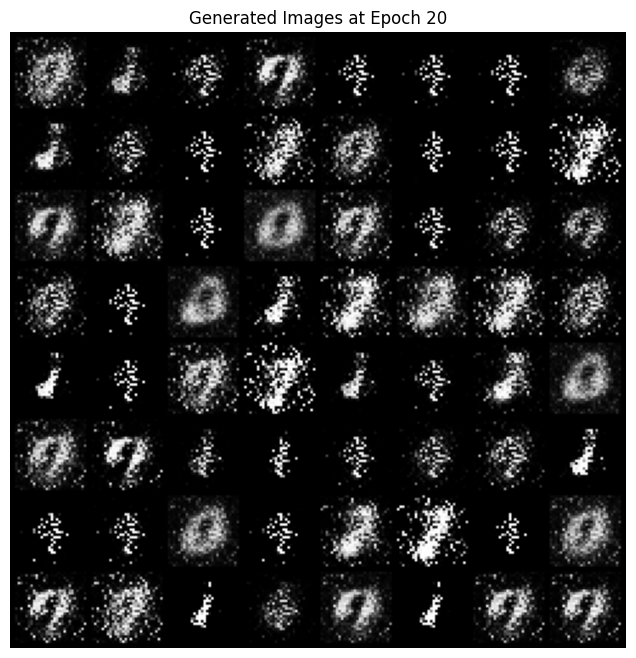

Epoch [21/50], d_loss: 0.3835, g_loss: 4.4172
Epoch [22/50], d_loss: 0.3140, g_loss: 3.7278
Epoch [23/50], d_loss: 0.2642, g_loss: 3.2663
Epoch [24/50], d_loss: 0.4549, g_loss: 3.3339
Epoch [25/50], d_loss: 0.2914, g_loss: 3.9045
Epoch [26/50], d_loss: 0.5065, g_loss: 3.1971
Epoch [27/50], d_loss: 0.6261, g_loss: 4.2486
Epoch [28/50], d_loss: 0.5967, g_loss: 2.9399
Epoch [29/50], d_loss: 0.7272, g_loss: 2.9224
Epoch [30/50], d_loss: 0.5116, g_loss: 2.5679


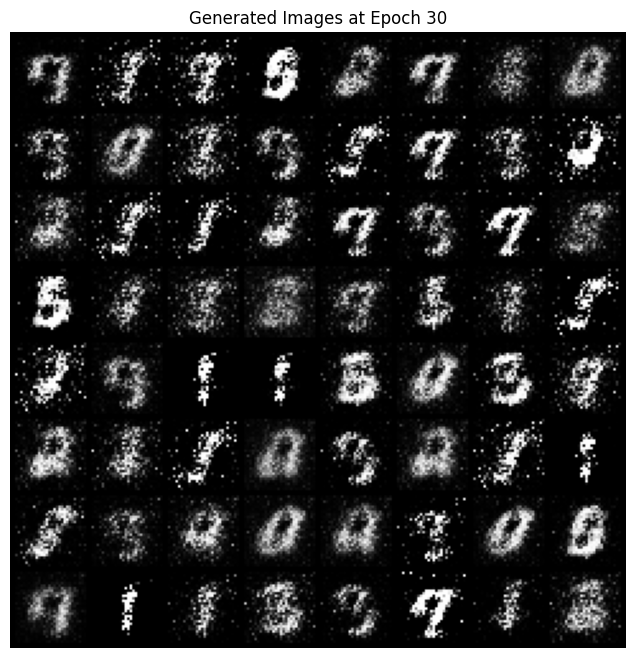

Epoch [31/50], d_loss: 0.6184, g_loss: 3.0284
Epoch [32/50], d_loss: 0.6437, g_loss: 3.3498
Epoch [33/50], d_loss: 0.7753, g_loss: 2.6297
Epoch [34/50], d_loss: 0.4689, g_loss: 3.8537
Epoch [35/50], d_loss: 0.7386, g_loss: 3.3384
Epoch [36/50], d_loss: 0.5543, g_loss: 3.1228
Epoch [37/50], d_loss: 0.6875, g_loss: 2.6446
Epoch [38/50], d_loss: 0.7667, g_loss: 2.4942
Epoch [39/50], d_loss: 0.9757, g_loss: 2.2060
Epoch [40/50], d_loss: 0.7509, g_loss: 2.2374


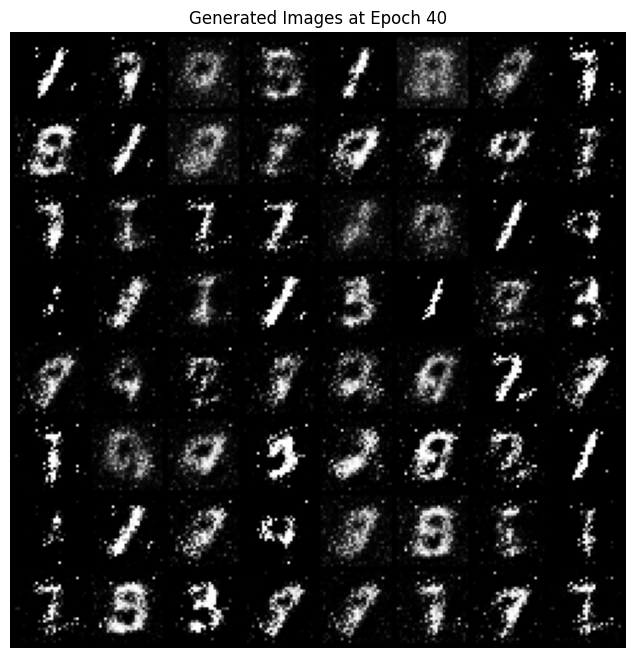

Epoch [41/50], d_loss: 0.5344, g_loss: 2.7671
Epoch [42/50], d_loss: 0.5861, g_loss: 2.7190
Epoch [43/50], d_loss: 0.4836, g_loss: 3.0122
Epoch [44/50], d_loss: 0.3576, g_loss: 3.7538
Epoch [45/50], d_loss: 0.6068, g_loss: 2.5979
Epoch [46/50], d_loss: 0.4303, g_loss: 3.1349
Epoch [47/50], d_loss: 0.5734, g_loss: 3.0864
Epoch [48/50], d_loss: 0.5173, g_loss: 2.8612
Epoch [49/50], d_loss: 0.5286, g_loss: 2.5636
Epoch [50/50], d_loss: 0.6895, g_loss: 1.9381


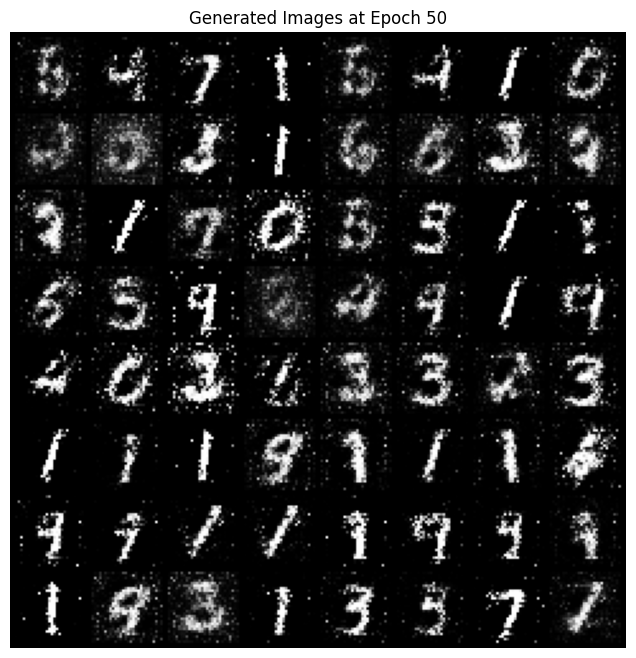

In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        batch_size = real_imgs.size(0)

        real_imgs = real_imgs.to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        outputs = D(real_imgs)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, noise_dim).to(device)
        fake_imgs = G(z)
        outputs = D(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        D_optimizer.zero_grad()
        d_loss.backward()
        D_optimizer.step()

        # Train Generator
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_imgs = G(z)
        outputs = D(fake_imgs)
        g_loss = criterion(outputs, real_labels)

        G_optimizer.zero_grad()
        g_loss.backward()
        G_optimizer.step()

    # Display progress and save sample images
    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')
    if (epoch+1) % 10 == 0 or epoch == 0:
        with torch.no_grad():
            z = torch.randn(64, noise_dim).to(device)
            generated = G(z).cpu().detach()
            grid = torchvision.utils.make_grid(generated, nrow=8, normalize=True)
            plt.figure(figsize=(8,8))
            plt.title(f'Generated Images at Epoch {epoch+1}')
            plt.axis('off')
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.show()
